In [1]:
'''Importación de librerías necesarias para la elaboración del modelo de Árbol de Decisión'''
import pandas as pd
import seaborn as sn
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
'''Carga y visualización del dataset que se va a utilizar'''
df=pd.read_csv('Dataset of Diabetes .csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
'''Verificamos todos los valores que tiene la columna CLASS para poder reemplazar por valores numéricos'''
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [4]:
'''Estandarizamos los valores de N y Y debido a que habían campos en los que estaban con espacios'''
df['CLASS'] = df['CLASS'].replace('N ','N')
df['CLASS'] = df['CLASS'].replace('Y ','Y')

In [5]:
'''Verificamos que tengamos los valores correctos'''
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [6]:
'''Verificamos todos los valores que tiene la columna Gender para poder reemplazar por valores numéricos'''
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [7]:
'''Estandarizamos los valores de F debido a que existen campos donde hay f minuscula'''
df['Gender'] = df['Gender'].replace('f','F')

In [8]:
'''Verificamos que tengamos los valores correctos'''
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
''' Mapeamos los valores que están como caracteres a valores numéricos en las columnas CLASS y Gender'''
df['CLASS'] = df['CLASS'].map({'N':0,'P':1,'Y':2})
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [10]:
'''Verificamos que se hayan cambiado los valores a numéricos'''
print("Datos de la columna Gender: ",df['Gender'].unique())
print("Datos de la columna CLASS: ",df['CLASS'].unique())

Datos de la columna Gender:  [0 1]
Datos de la columna CLASS:  [0 1 2]


In [11]:
'''Definición de las características (variables de entrada) que son relevantes para definir una salida'''
features = ['Gender', 'AGE', 'Urea','Cr','HbA1c', 'Chol', 'TG','HDL','LDL', 'VLDL', 'BMI']
X = df[features]
X

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [12]:
'''Definición de la variable dependiente, la columna con los valores que intentamos predecir'''
y = df['CLASS']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    2
997    2
998    2
999    2
Name: CLASS, Length: 1000, dtype: int64

In [13]:
'''Separación de porcentajes, 70% para entrenar y 30% para realizar pruebas de X y Y'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
'''Creación del árbol de decisión y ajustamos los valores del modelo a partir de la X y la Y'''
modelo = DecisionTreeClassifier()
modelo = modelo.fit(X_train,y_train)
'''Predicción de la Y a partir de la variable x destinada a realizar pruebas'''
y_pred = modelo.predict(X_test)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.97



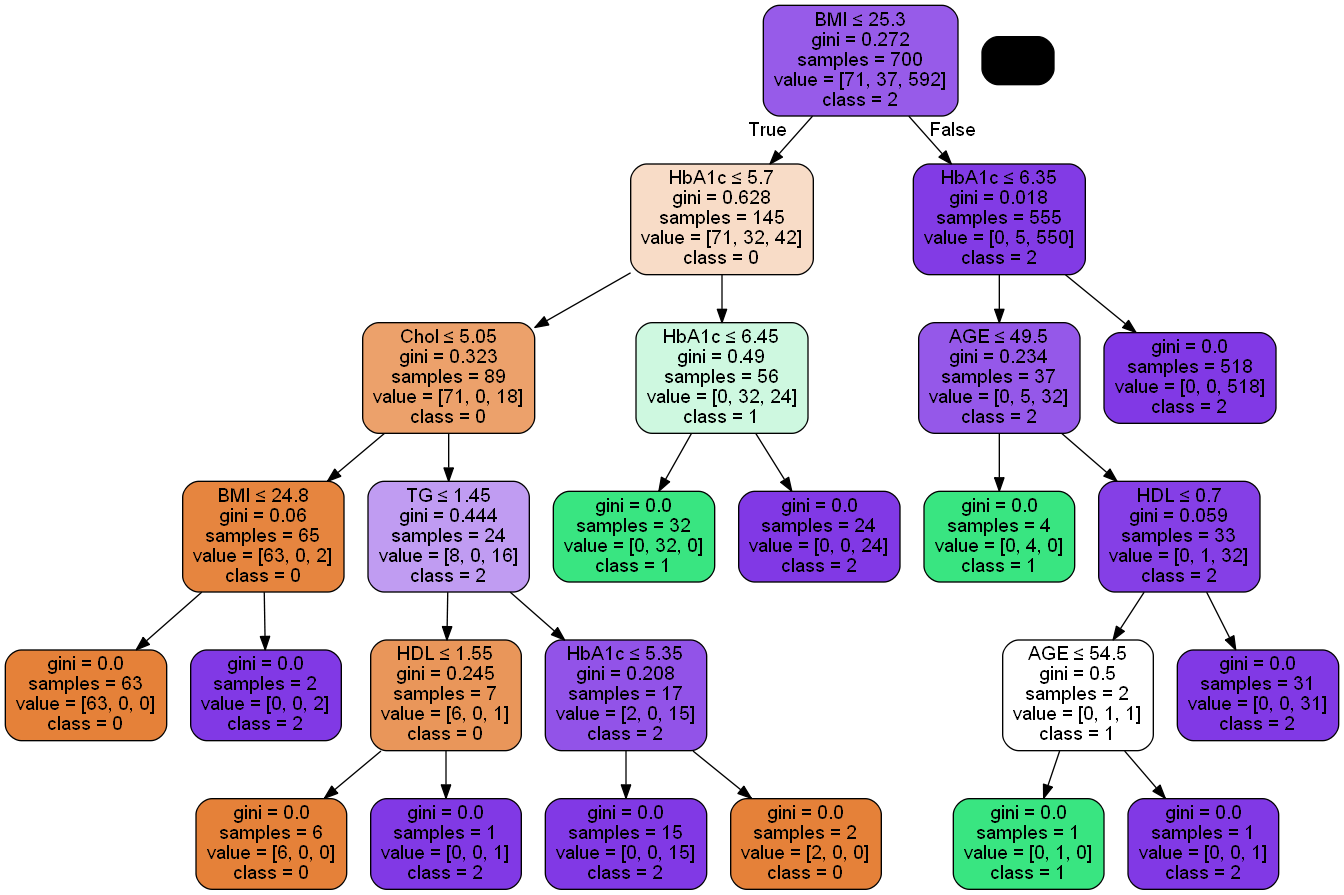

In [15]:
'''Visualización y Exportación en formato imágen del árbol de decisión generado'''
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = features,
                class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Pruning

In [16]:
'''Creación del árbol de decisión con una produndidad de 3 y ajustamos los valores del modelo a partir de la X y la Y '''
modelo = DecisionTreeClassifier(criterion="entropy",max_depth=3)
modelo = modelo.fit(X_train,y_train)
'''Predicción de la Y a partir de la variable x destinada a realizar pruebas'''
y_pred = modelo.predict(X_test)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.95



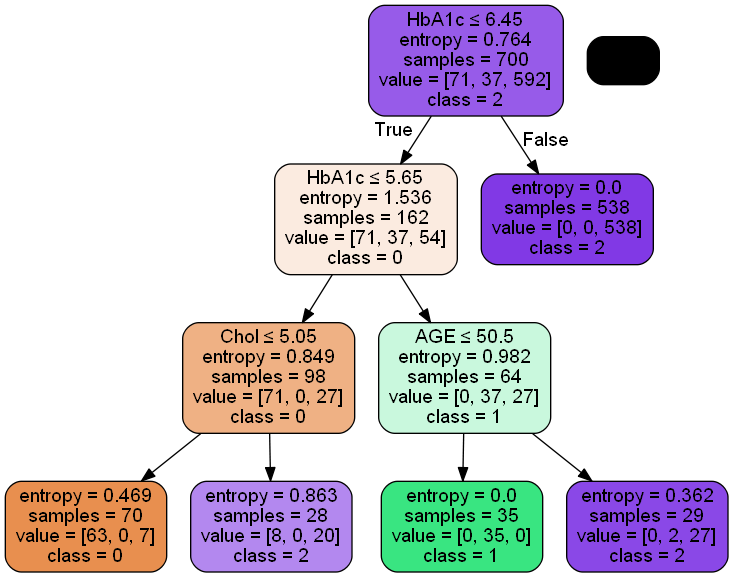

In [17]:
'''Visualización y Exportación en formato imágen del árbol de decisión podado'''
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = features,
                class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetesPodado.png')
Image(graph.create_png())

In [18]:
'''Creación de la matriz de confusión mediante crosstab '''
matriz_Confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicción'])
matriz_Confusion

Predicción,0,1,2
Actual,,,
0,26,0,6
1,0,16,0
2,8,0,244


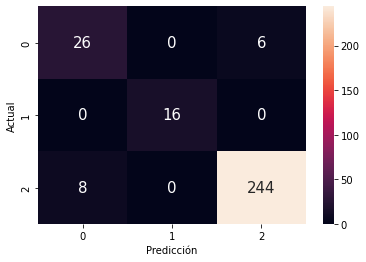

In [19]:
'''Gráfica de la matriz de confusión mediante heatmap'''
sn.heatmap(matriz_Confusion, annot=True,  annot_kws={'size': 15}, fmt = "d")
plt.show()

In [20]:
'''Métricas de evalucación del modelo'''
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.91
Macro Recall: 0.93
Macro F1-score: 0.92

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

     Class 1       0.76      0.81      0.79        32
     Class 2       1.00      1.00      1.00        16
     Class 3       0.98      0.97      0.97       252

    accuracy                           0.95       300
   macro avg       0.91      0.93      0.92       300
weighted avg       0.95      0.95      0.95       300

